In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_events_data_from_insaid=pd.read_csv("Modified_Event_Data_final.csv",dtype={'device_id':np.float64,'event_id': str})
#converters={'device_id': np.int64,'event_id': str}

In [3]:
df_events_data_from_insaid.head()

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,city,state,newState,newCity
0,0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
1,1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
2,2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
3,3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
4,4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi


In [4]:
df_events_data_from_insaid.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df_events_data_from_insaid[df_events_data_from_insaid.device_id==""].shape

C:\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(0, 9)

In [6]:
df_events_data_from_insaid[df_events_data_from_insaid.city.isnull()]

,event_id,device_id,timestamp,longitude,latitude,city,state,newState,newCity


In [7]:
df_events_data_from_insaid.replace('',np.nan,inplace=True)

In [8]:
df_events_data_from_insaid.device_id.isnull().sum()

453

In [9]:
df_events_data_from_insaid.dropna(subset=['device_id'],axis=0,inplace=True)

In [10]:
df_events_data_from_insaid[df_events_data_from_insaid.device_id==""].shape

(0, 9)

In [11]:
df_events_data_from_insaid.device_id.isnull().sum()

0

In [12]:
df_events_data_from_insaid.shape

(3252497, 9)

In [13]:
df_user_data=pd.read_csv("gender_age_train.csv")

In [14]:
df_user_data.head()

,device_id,gender,age,group
0,-8076087639492060000,M,35,M32-38
1,-2897161552818060000,M,35,M32-38
2,-8260683887967670000,M,35,M32-38
3,-4938849341048080000,M,30,M29-31
4,245133531816851000,M,30,M29-31


In [15]:
df_user_data[df_user_data.duplicated(subset=['device_id'])]

,device_id,gender,age,group


In [16]:
df_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [17]:
df_events_data_from_insaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252497 entries, 0 to 3252949
Data columns (total 9 columns):
event_id     object
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
newState     object
newCity      object
dtypes: float64(3), object(6)
memory usage: 248.1+ MB


In [18]:
user_even_merged=df_user_data.merge(df_events_data_from_insaid,how="left",on="device_id")

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [19]:
user_even_merged[user_even_merged.duplicated(subset=["device_id"])]

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,city,state,newState,newCity
354,-637891494492896000,M,25,M23-26,158410.0,2016-05-07 19:26:31,88.452894,22.640237,Calcutta,WestBengal,WestBengal,Calcutta
355,-637891494492896000,M,25,M23-26,228535.0,2016-05-03 15:20:00,88.452894,22.640237,Calcutta,WestBengal,WestBengal,Calcutta
356,-637891494492896000,M,25,M23-26,244762.0,2016-05-04 07:57:51,88.452894,22.640237,Calcutta,WestBengal,WestBengal,Calcutta
357,-637891494492896000,M,25,M23-26,260704.0,2016-05-05 19:27:24,88.452894,22.640237,Calcutta,WestBengal,WestBengal,Calcutta
358,-637891494492896000,M,25,M23-26,381087.0,2016-05-04 17:10:12,88.452894,22.640237,Calcutta,WestBengal,WestBengal,Calcutta
...,...,...,...,...,...,...,...,...,...,...,...,...
77469,99479029389286800,M,41,M39+,3091948.0,2016-05-07 08:24:17,72.856323,19.055240,Mumbai,Maharashtra,Maharashtra,Mumbai
77470,99479029389286800,M,41,M39+,3103578.0,2016-05-03 15:20:07,72.856323,19.055240,Mumbai,Maharashtra,Maharashtra,Mumbai
77471,99479029389286800,M,41,M39+,3141012.0,2016-05-07 09:10:49,72.856323,19.055240,Mumbai,Maharashtra,Maharashtra,Mumbai
77472,99479029389286800,M,41,M39+,3208339.0,2016-05-04 18:31:31,72.856323,19.055240,Mumbai,Maharashtra,Maharashtra,Mumbai


In [20]:
df_user_data[df_user_data.device_id==-8076087639492060000]

,device_id,gender,age,group
0,-8076087639492060000,M,35,M32-38


In [21]:
df_events_data_from_insaid[df_events_data_from_insaid.device_id==-8076087639492060000]

,event_id,device_id,timestamp,longitude,latitude,city,state,newState,newCity


In [22]:
user_even_merged.drop_duplicates(subset=["device_id"],keep="first",inplace=True)

In [23]:
user_even_merged.shape

(74645, 12)

In [24]:
user_even_merged[user_even_merged.newState.isnull()]

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,city,state,newState,newCity
0,-8076087639492060000,M,35,M32-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2897161552818060000,M,35,M32-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-8260683887967670000,M,35,M32-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4938849341048080000,M,30,M29-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,245133531816851000,M,30,M29-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
78121,4682031842235080000,M,30,M29-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78122,-9178703742877130000,M,30,M29-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78123,180946546684162000,M,20,M22-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78124,1390702386071990000,M,37,M32-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Find device id from user table has entries in event data
def get_event_entry_from_device_id_in_user(row):
    device_id=row.device_id
    print(device_id,len(df_events_data_from_insaid[df_events_data_from_insaid.device_id==device_id]))

In [26]:
# df_user_data.apply(get_event_entry_from_device_id_in_user,axis=1)

,device_id,gender,age,group
0,-8076087639492060000,M,35,M32-38
1,-2897161552818060000,M,35,M32-38
2,-8260683887967670000,M,35,M32-38
3,-4938849341048080000,M,30,M29-31
4,245133531816851000,M,30,M29-31


In [27]:
df_events_data_from_insaid.groupby("newState").count()["device_id"]

newState
AndamanandNicobarIslands      1515
Andhra Pradesh                  47
AndhraPradesh               321263
ArunachalPradesh               608
Assam                        12021
Bihar                        35472
Chandigarh                     894
Chhattisgarh                  9754
Delhi                       751687
Goa                           3250
Gujarat                      42849
Haryana                      21053
HimachalPradesh               1409
JammuandKashmir               5385
Jharkhand                    18060
Karnataka                    99072
Kerala                       23148
Madhya Pradesh                  51
MadhyaPradesh               232639
Maharashtra                 677096
Manipur                        989
Meghalaya                     1515
Mizoram                       1613
Nagaland                      2298
Orissa                       15904
Pondicherry                   1741
Punjab                       26179
Rajasthan                   196329
Tamil Nadu 

In [49]:
df_events_data_from_insaid["newState"].replace({"Andhra Pradesh":"AndhraPradesh",
                                               "Madhya Pradesh":"MadhyaPradesh",
                                               "Tamil Nadu":"Tamil Nadu",
                                               "Uttar Pradesh":"UttarPradesh",
                                               "West Bengal":"WestBengal"},inplace=True)

In [50]:
df_events_data_from_insaid.newState.value_counts()

Delhi                       751687
Maharashtra                 677096
TamilNadu                   436219
AndhraPradesh               321310
MadhyaPradesh               232690
Rajasthan                   196329
WestBengal                  196203
Karnataka                    99072
UttarPradesh                 94791
Gujarat                      42849
Bihar                        35472
Punjab                       26179
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur             

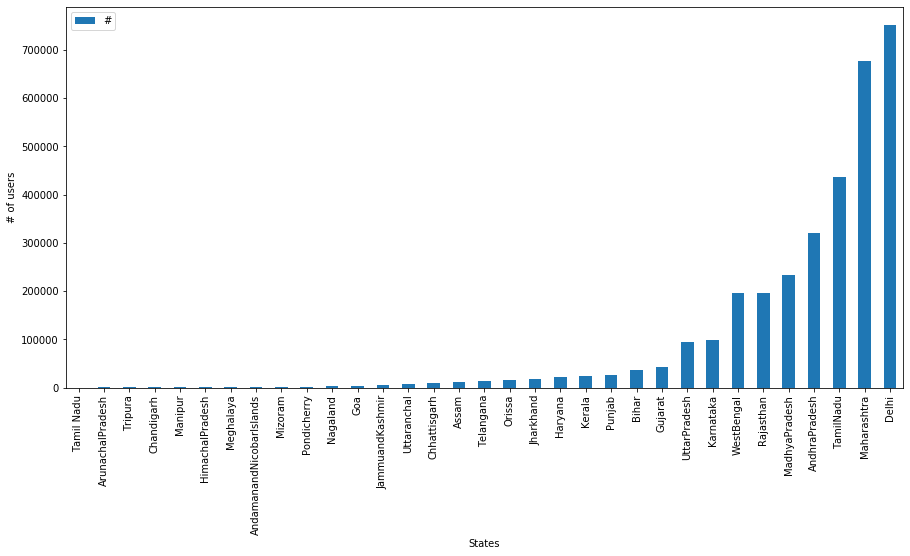

In [51]:
fig, ax = plt.subplots(figsize=(15,7))

df_grouped=df_events_data_from_insaid.groupby("newState").count()["device_id"].sort_values().plot(kind="bar",ax=ax)
plt.xlabel("States")
plt.ylabel("# of users")
plt.legend("# of users across states")

## Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [31]:
df_phone_brand_device_model=pd.read_excel("phone_brand_device_model.xlsx")

In [32]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [33]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [34]:
df_event_data=pd.read_csv("Modified_Event_Data_final.csv", parse_dates=["timestamp"], date_parser=mydateparser)

In [35]:
df_event_data.reset_index(inplace=True)

In [39]:
df_event_data.head()

,index,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,city,state,newState,newCity
0,0,0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
1,1,1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
2,2,2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
3,3,3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
4,4,4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi


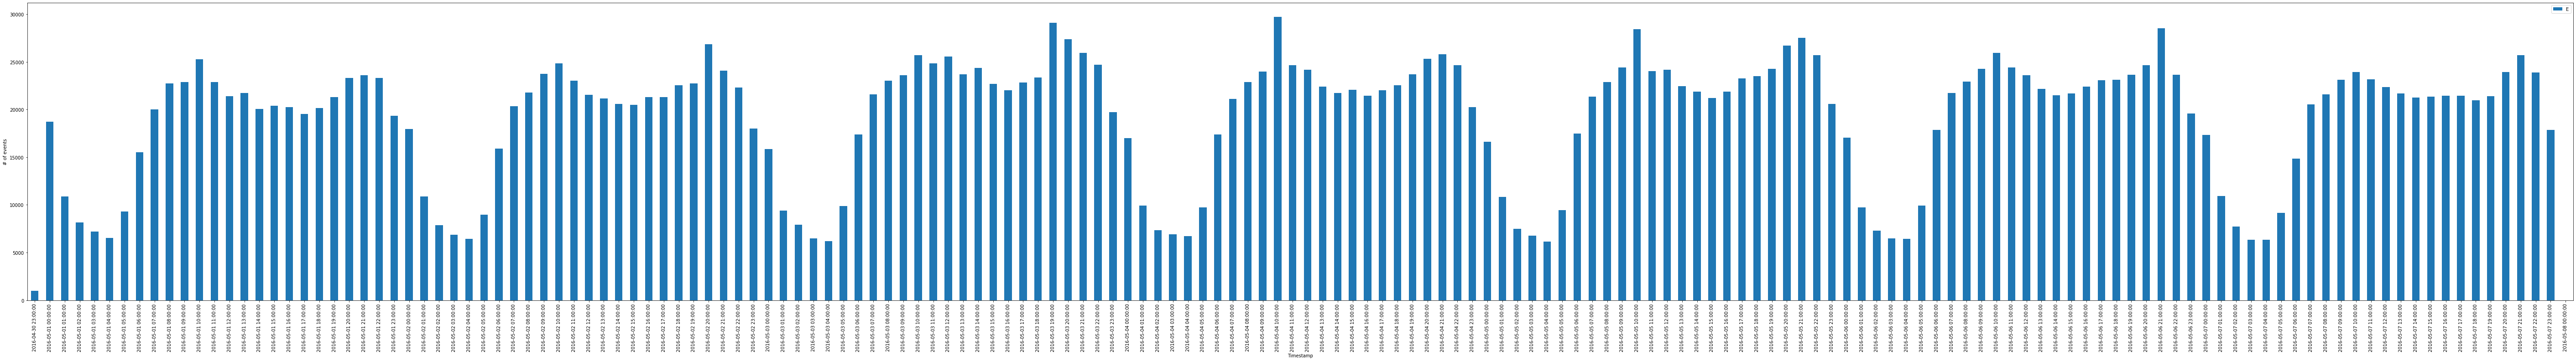

In [48]:
#df_event_data.groupby(pd.TimeGrouper(freq='60Min')).count().plot(kind='bar')

# df_event_data.set_index('timestamp').groupby([pd.TimeGrouper('6M'),'event_id']).count()

#df_event_data.set_index('timestamp').groupby(TimeGrouper(freq="60M")).count()

fig, ax = plt.subplots(figsize=(100,12))
df_event_data.set_index('timestamp').groupby([pd.Grouper(freq='H')])["event_id"].count().plot(kind="bar",ax=ax)
plt.xlabel("Timestamp")
plt.ylabel("# of events")
plt.legend("Events")
plt.show()

In [56]:
df_event_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,newState,newCity
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi,Delhi,Delhi


In [55]:
df_event_data.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [57]:
df_event_data.drop_duplicates(subset=["device_id"],inplace=True)

Text(0.5, 1.0, '# of users across states')

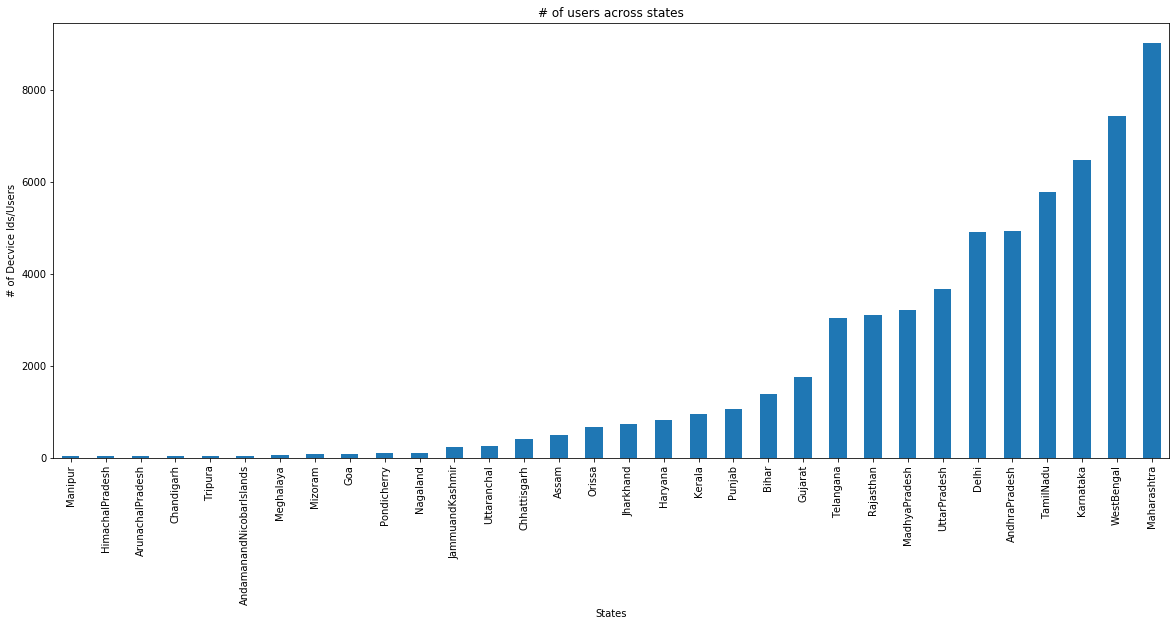

In [71]:
fig, ax = plt.subplots(figsize=(20,8))
df_event_data.groupby("newState").count().sort_values(by="device_id")["device_id"].plot(kind="bar", ax=ax)
plt.xlabel("States")
plt.ylabel("# of Decvice Ids/Users")
plt.title("# of users across states")


,device_id,gender,age,group
